In [3]:
import torch
import fastai
print("Versión de PyTorch:", torch.__version__)
print("Versión de Fastai:", fastai.__version__)

Versión de PyTorch: 2.0.1+cpu
Versión de Fastai: 2.7.12


In [4]:
import torch
import fastai
from fastai.vision.all import *

In [5]:
# now lets create a fastai datablock
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # specify the nature of indep/dep variables
    get_items=get_image_files,  # define how to access the data
    splitter=RandomSplitter(valid_pct=0.15, seed=40),  # define how we split data
    get_y=parent_label,  # label each image by the name of folder
    item_tfms=Resize((181, 156), method='crop'),  # resize images through cropping
    batch_tfms=aug_transforms()  # apply transformations
)

    blocks=(ImageBlock, CategoryBlock): This line defines the nature of the independent (ImageBlock) and dependent (CategoryBlock) variables. In this case, it seems that the data consists of images (independent variable) and categories (dependent variable).

    get_items=get_image_files: This specifies how to access the data. It uses the get_image_files function, which likely retrieves a list of image file paths from a specified location.

    splitter=RandomSplitter(valid_pct=0.15, seed=40): It defines how the data should be split into training and validation sets. Here, it uses a random splitter to create a validation set with 15% of the total data and sets a seed of 40 to ensure reproducibility.

    get_y=parent_label: This is used to label each image by the name of its parent folder. It's a convenient way to set the category labels based on the folder structure.

    item_tfms=Resize((181, 156), method='crop'): It applies image transformations to the input data. In this case, the images are resized to a size of (181, 156) using the 'crop' method. This means the images will be cropped to fit the specified size.

    batch_tfms=aug_transforms(): This line applies data augmentation transformations to the data in batches. aug_transforms() is a function from fastai that provides a set of standard data augmentation techniques such as rotation, flipping, brightness adjustments, etc. This helps increase the diversity of the training data and improve the model's generalization.

After creating the DataBlock, it can be used with a data source (like a folder with images) to create a DataLoader for training a deep learning model using the fastai library.

In [6]:
path = Path("archive")

In [7]:
# now using this datablock object lets create our dataloader
dls = data.dataloaders(path)

In [8]:
print("Número de clases:", len(dls.vocab))
print("Número total de muestras:", len(dls.train_ds) + len(dls.valid_ds))

Número de clases: 12
Número total de muestras: 5539


In [7]:
!pip show fastai


Name: fastai
Version: 2.7.12
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: c:\users\usuario\anaconda3\lib\site-packages
Requires: fastcore, fastdownload, fastprogress, matplotlib, packaging, pandas, pillow, pip, pyyaml, requests, scikit-learn, scipy, spacy, torch, torchvision
Required-by: 


In [16]:
defaults.callbacks[1] = Recorder(train_metrics=True) # para que haga tracking de las metricas de train
defaults.callbacks

[fastai.callback.core.TrainEvalCallback,
 Recorder,
 fastai.learner.CastToTensor,
 fastai.callback.progress.ProgressCallback]

In [17]:
model = cnn_learner( dls,  # our data
    models.resnet34,  # lets use a resnet34 pretrained model
    metrics=[error_rate, accuracy]  # use both error rate and accuracy metrics
    #callback_fns=[partial(TrainMetricsRecorder, show_graph=True)]
)

C:\Users\Usuario\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\Usuario\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.001737800776027143)

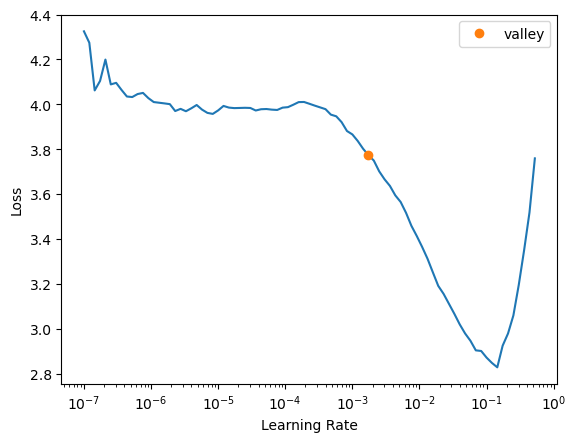

In [8]:
# produce a plot of how various learning rates affect loss
model.lr_find()

Lo que hace lr_find() es probar diferentes tasas de aprendizaje en un rango amplio de valores y medir cómo afecta a la función de pérdida durante un breve período de entrenamiento. Luego, genera un gráfico conocido como "gráfico de tasa de aprendizaje contra pérdida" (learning rate vs. loss plot) que muestra cómo la pérdida cambia a medida que aumenta o disminuye la tasa de aprendizaje.

model = cnn_learner( dls,  # our data
    models.resnet34,  # lets use a resnet34 pretrained model
    metrics=[error_rate, accuracy]  # use both error rate and accuracy metrics
)

Aquí está el significado de cada argumento en la función cnn_learner():

dls: representa el objeto DataLoaders que contiene los datos de entrenamiento y validación que se utilizarán para entrenar el modelo.

models.resnet34: especifica la arquitectura del modelo que se utilizará. En este caso, se está utilizando el modelo ResNet34 pre-entrenado.

metrics=[error_rate, accuracy]: especifica las métricas que se utilizarán para evaluar el rendimiento del modelo durante el entrenamiento. En este caso, se está utilizando la tasa de error (error_rate) y la precisión (accuracy).

Cuando utilizas cnn_learner() con models.resnet34, Fastai carga automáticamente el modelo pre-entrenado ResNet34, y agrega las capas adicionales necesarias para que el modelo se ajuste a la tarea de clasificación específica que estás abordando. Estas capas adicionales se agregan al final del modelo para que puedas adaptarlo a tus clases de datos específicas.

Por lo tanto, cuando ejecutas model.fit_one_cycle(4, 2e-3), estás entrenando el modelo que creaste con cnn_learner(), que ya incluye las capas pre-entrenadas de ResNet34 y las capas adicionales necesarias para tu tarea de clasificación específica.

In [18]:
model.fit_one_cycle(4, 2e-3) # entrenar las capas agregadas al azar durante 4 épocas con una tasa de aprendizaje de 0.002
model.unfreeze()  # now we can 'unfreeze' the upstream pretrained layers

epoch,train_loss,train_error_rate,train_accuracy,valid_loss,valid_error_rate,valid_accuracy,time
0,1.554050,0.515197,0.484803,0.609873,0.193976,0.806024,07:40


In [20]:
print(model.recorder.values)
print(model.recorder.metric_names)

[[1.5540504455566406, 0.5151969194412231, 0.48480308055877686, 0.6098731160163879, 0.19397591054439545, 0.8060240745544434]]
['epoch', 'train_loss', 'train_error_rate', 'train_accuracy', 'valid_loss', 'valid_error_rate', 'valid_accuracy', 'time']


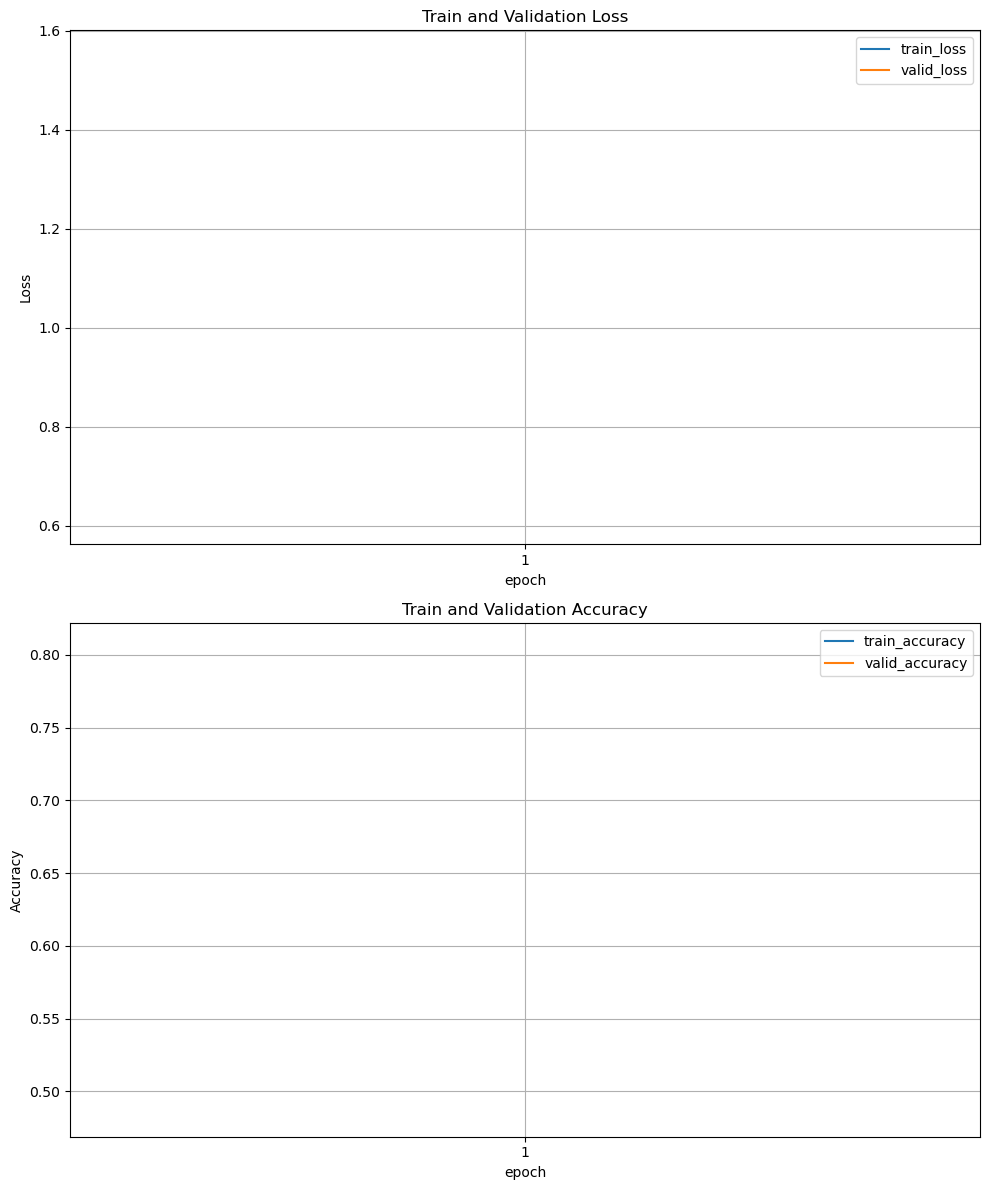

In [21]:
import matplotlib.pyplot as plt

def plot_metrics_combined(values, metric_names):
    epochs = range(1, len(values) + 1)
    train_losses = [v[0] for v in values]
    valid_losses = [v[3] for v in values]
    train_acc = [v[2] for v in values]
    valid_acc = [v[5] for v in values]
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # Cambiamos 'subplots' a 'plt.subplots'
    
    axs[0].plot(epochs, train_losses, label=metric_names[1]) #label='Entrenamiento')
    axs[0].plot(epochs, valid_losses, label=metric_names[4])
    axs[0].set_xlabel(metric_names[0])
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Train and Validation Loss')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(epochs, train_acc, label=metric_names[3])
    axs[1].plot(epochs, valid_acc, label=metric_names[6])
    axs[1].set_xlabel(metric_names[0])
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Train and Validation Accuracy')
    axs[1].legend()
    axs[1].grid(True)

    axs[0].set_xticks(epochs)
    axs[1].set_xticks(epochs)

    plt.tight_layout()  # Ajusta el diseño de los subplots para evitar superposiciones
    plt.show()

values = model.recorder.values
metric_names = model.recorder.metric_names

plot_metrics_combined(values, metric_names)



SuggestedLRs(valley=3.630780702224001e-05)

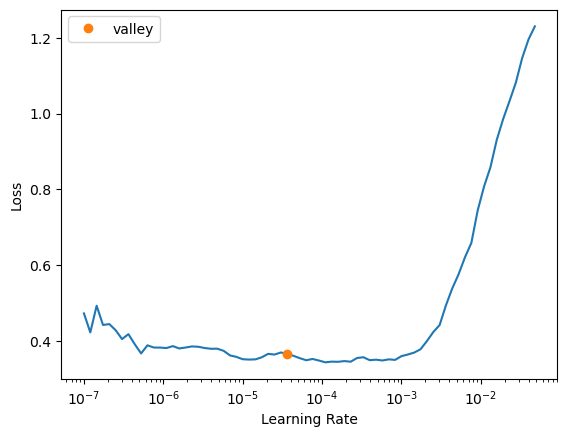

In [48]:
model.lr_find() # volver a buscar el mejor learning rate en el estado actual de mi modelo

In [125]:
# train the model for 7 more epochs and apply the discriminative learning rates
model.fit_one_cycle(7, lr_max=slice(7e-5, 7e-4))
'''model.fit_one_cycle(7, lr_max=slice(7e-5, 7e-4)), la función fit_one_cycle() se utiliza para entrenar el modelo
   durante 7 épocas con una política de tasa de aprendizaje "one-cycle", donde el valor máximo de la tasa de
   aprendizaje se ajusta dinámicamente en el rango entre 7e-5 (0.00007) y 7e-4 (0.0007).
   Durante las primeras épocas, la tasa de aprendizaje será aumentada gradualmente desde 7e-5 hasta 7e-4, y luego
   será reducida gradualmente durante las últimas épocas. Este ajuste dinámico de la tasa de aprendizaje puede ayudar
   al modelo a explorar el espacio de búsqueda de manera más efectiva y mejorar el rendimiento en el conjunto de datos.
'''

epoch,train_loss,train_error_rate,train_accuracy,valid_loss,valid_error_rate,valid_accuracy,time
0,0.534743,0.177654,0.822346,0.310693,0.115663,0.884337,08:37
1,0.306218,0.092894,0.907106,0.194998,0.071084,0.928916,08:23


'model.fit_one_cycle(7, lr_max=slice(7e-5, 7e-4)), la función fit_one_cycle() se utiliza para entrenar el modelo\n   durante 7 épocas con una política de tasa de aprendizaje "one-cycle", donde el valor máximo de la tasa de\n   aprendizaje se ajusta dinámicamente en el rango entre 7e-5 (0.00007) y 7e-4 (0.0007).\n   Durante las primeras épocas, la tasa de aprendizaje será aumentada gradualmente desde 7e-5 hasta 7e-4, y luego\n   será reducida gradualmente durante las últimas épocas. Este ajuste dinámico de la tasa de aprendizaje puede ayudar\n   al modelo a explorar el espacio de búsqueda de manera más efectiva y mejorar el rendimiento en el conjunto de datos.\n'

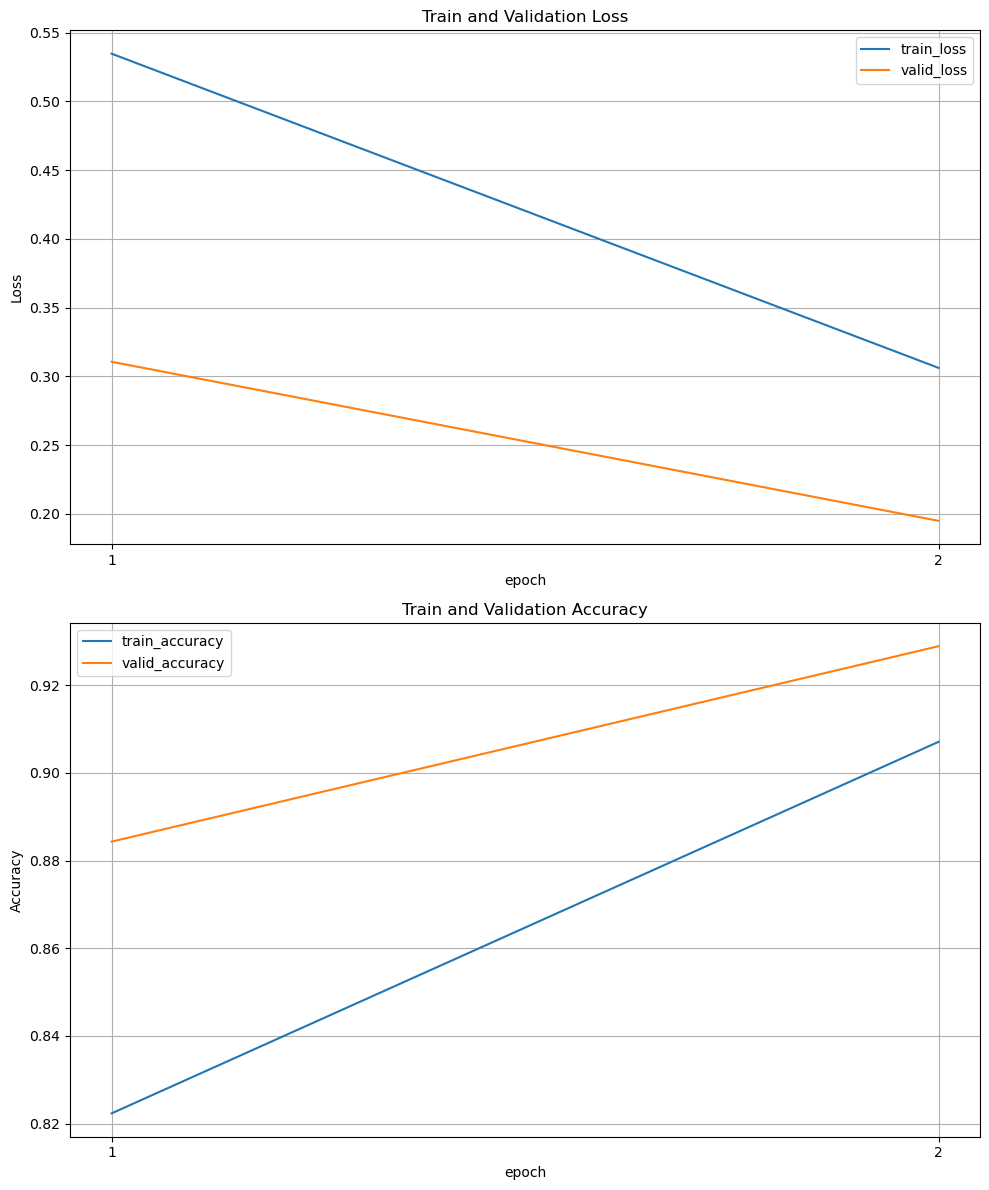

In [126]:
values = model.recorder.values
metric_names = model.recorder.metric_names
plot_metrics_combined(values, metric_names)

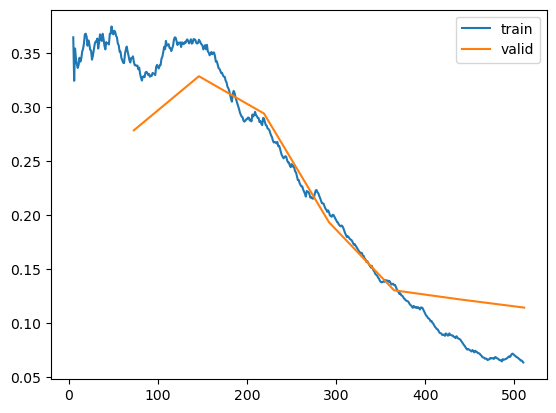

In [13]:
# plot the losses
model.recorder.plot_loss()

In [36]:
print(confusion_matrix_percentage)

[[31.91  0.    0.    0.    6.38  0.   59.57  0.    2.13  0.    0.    0.  ]
 [ 1.33 88.    1.33  0.    0.    0.    0.    0.    1.33  4.    2.67  1.33]
 [ 0.    7.14 87.5   0.    1.79  0.    0.    0.    1.79  0.    1.79  0.  ]
 [ 0.    0.    0.   79.82  0.    6.14  1.75  0.    3.51  1.75  6.14  0.88]
 [19.23  0.    0.    0.   50.    3.85 19.23  7.69  0.    0.    0.    0.  ]
 [ 2.67  2.67  0.    4.    1.33 72.    4.    2.67  0.    4.    1.33  5.33]
 [ 2.91  0.    0.    0.    0.97  0.97 94.17  0.    0.97  0.    0.    0.  ]
 [ 0.    2.56  0.    2.56  0.    2.56  2.56 82.05  0.    0.    0.    7.69]
 [ 0.    0.    0.    3.26  0.    2.17  5.43  1.09 85.87  1.09  1.09  0.  ]
 [ 0.    4.55  0.    0.    0.    0.    0.    2.27 22.73 56.82 11.36  2.27]
 [ 0.    1.16  1.16  0.    0.    0.    0.    1.16  1.16  2.33 93.02  0.  ]
 [ 0.    0.    0.    1.37  1.37  2.74  0.    0.    0.    1.37  0.   93.15]]


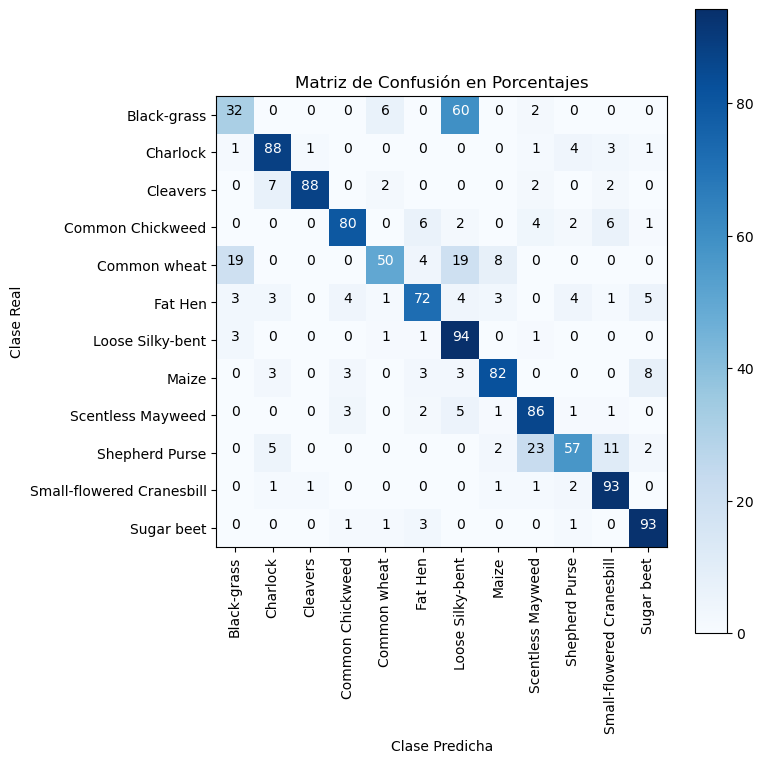

In [43]:
# plot a confusion matrix between labels
#ClassificationInterpretation.from_learner(model).plot_confusion_matrix(figsize=(6,6), dpi=60)

# CM as %

from fastai.interpret import ClassificationInterpretation
import matplotlib.pyplot as plt
import numpy as np

# Crear una instancia de ClassificationInterpretation desde el Learner
interp = ClassificationInterpretation.from_learner(model)

# Obtener la matriz de confusión
confusion_matrix = interp.confusion_matrix()

# Calcular la matriz de confusión en porcentajes
sum_per_class = confusion_matrix.sum(axis=1, keepdims=True)
cm = (confusion_matrix / sum_per_class) * 100

# Obtener los nombres de las clases
class_names = dls.vocab

# Plot de la matriz de confusión en porcentajes
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión en Porcentajes')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]:0.0f}",  # Display percentage value
             horizontalalignment="center",
             color="white" if cm[i, j] > ( cm.max() / 2) else "black")
    
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()

plt.show()



In [71]:
import pickle
# Guardar los valores y nombres de métricas utilizando pickle
with open('values_7cycle_results.pkl', 'wb') as f:
    pickle.dump(values, f)
with open('metric_names_7cycle_results.pkl', 'wb') as f:
    pickle.dump(metric_names, f)

In [128]:
file = 'model_7cycle_results5.pkl'
model.export(file)

In [19]:
from fastai.learner import load_learner
# Cargar el modelo y el Learner utilizando load_learner
learner_load = load_learner('C:\\Users\\Usuario\\PLANTS RECOGNITION\\model_7cycle_results5.pkl')
